In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축 (3장.p.83~130)
from sklearn.tree import DecisionTreeClassifier # 결정 트리
# from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
# from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
# from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
# from sklearn.ensemble import BaggingClassifier # 앙상블
# from sklearn.linear_model import Perceptron # 퍼셉트론
# from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
# from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
# from sklearn.neural_network import MLPClassifier # 다층인공신경망

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer # 정확도, 민감도 등
from sklearn.metrics import roc_curve # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 9.하이퍼파라미터 튜닝

Matplotlib is building the font cache; this may take a moment.


In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank_df.shape

(5000, 14)

In [4]:
#자료구조 살펴보기
bank_df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#필요한 데이터만 추출
# data:X, target:y로 분리 
X = bank_df.drop (['ID','ZIPCode','PersonalLoan'], axis=1)
X.head() 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [6]:
y = bank_df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

In [7]:
X['Education'] = X['Education'].replace ([1,2,3], ['Under','Grad','Prof'])
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [8]:
X.keys()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
                      'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                   columns=['Education'],
                   drop_first = True)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,False,True
1,45,19,34,3,1.5,0,1,0,0,0,False,True
2,39,15,11,1,1.0,0,0,0,0,0,False,True
3,35,9,100,1,2.7,0,0,0,0,0,False,False
4,35,8,45,4,1.0,0,0,0,0,1,False,False


In [10]:
y


0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.3, random_state = 1, stratify=y)

In [12]:
#모델 구축
tree = DecisionTreeClassifier(criterion='gini', max_depth = None, random_state =1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
y_pred = tree.predict(X_test)

In [14]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1347,9
True[1],19,125


In [15]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [16]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 28
정확도: 0.981
정밀도: 0.933
재현율: 0.868
F1: 0.899


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.00663717, 1.        ]),
 array([0.        , 0.86805556, 1.        ]),
 array([2., 1., 0.]))

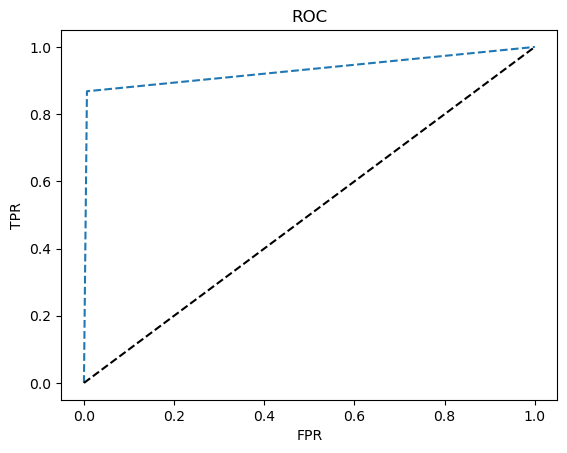

In [18]:
plt.plot(fpr, tpr, '--', label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [19]:
pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/278.7 kB 487.6 kB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=7c9233f9267528ae62a6e6496e580366ee129f7e35dca67711d062d8c3ccbeb0
  Stored in directory: c:\users\tnsmd\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [20]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image #CART Tree 그림 
import pydotplus
import os

In [21]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [22]:
feature_names = X.columns.tolist()
target_name = np.array(['No','Yes'])

In [23]:
dot_data = export_graphyiz(tree, filled=True, rounded=True, class_names = target_name,feature_names=feature_names, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

NameError: name 'export_graphyiz' is not defined

In [24]:
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=target_name,
                           feature_names=feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [25]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [26]:
feature_names = X.columns.tolist()
target_name = np.array(['No', 'Yes'])

In [27]:
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=target_name,
                           feature_names=feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

InvocationException: GraphViz's executables not found

In [28]:
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=target_name, feature_names=feature_names, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('tree.png')


InvocationException: GraphViz's executables not found

In [29]:
!pip install pydotplus

In [30]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image #CART Tree 그림 
import pydotplus
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = X.columns.tolist()
target_name = np.array(['No', 'Yes'])

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=target_name,
                           feature_names=feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 


InvocationException: GraphViz's executables not found

In [31]:
scores = cross_validate(estimator=tree, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1,
                        return_train_score=False)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.99428571 0.98285714 0.98       0.98285714 0.95428571 0.97714286
 0.99142857 0.98571429 0.96571429 0.98571429]
CV 정확도: 0.980 +/- 0.011


In [32]:
pipe_tree = make_pipeline(DecisionTreeClassifier())
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

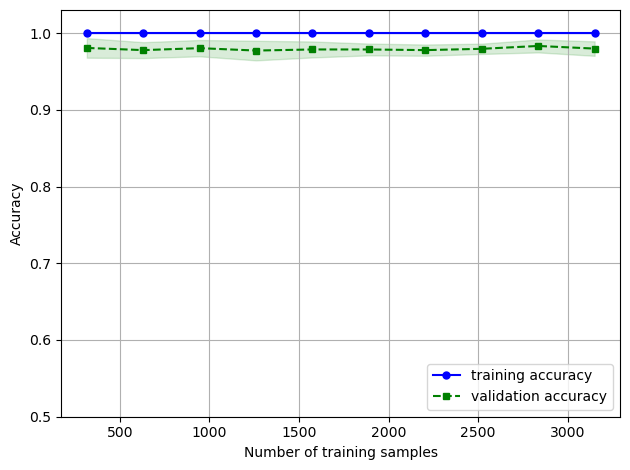

In [33]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_tree, # 수정
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])  # 수정
plt.tight_layout()
plt.show()

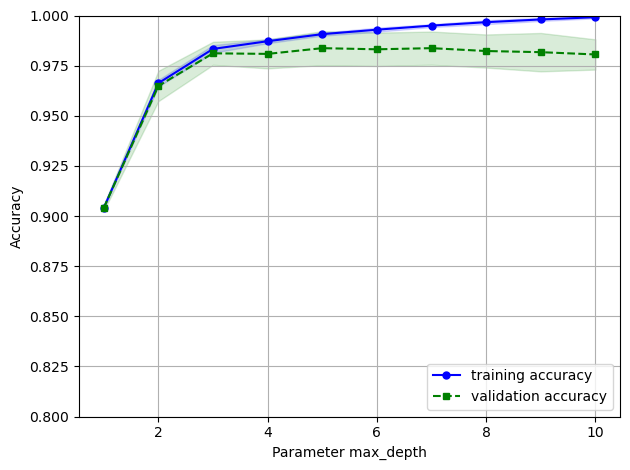

In [34]:
param_range = [1,2,3,4,5,6,7,8,9,10]  # 수정
train_scores, test_scores = validation_curve(
                estimator=pipe_tree, # 수정
                X=X_train, 
                y=y_train, 
                param_name='decisiontreeclassifier__max_depth', ## 수정
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth') # 수정
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth') # 수정
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.00])  # 수정
plt.tight_layout()
plt.show()

In [35]:
param_range1 = [1,2,3,4,5,6,7,8,9,10] # 수정
param_range2 = [10,20,30,40,50] # 수정

param_grid = [{'decisiontreeclassifier__max_depth': param_range1, # 수정
               'decisiontreeclassifier__min_samples_leaf': param_range2}] # 수정

gs = GridSearchCV(estimator=pipe_tree, # 수정
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9851428571428571
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


In [36]:
best_tree = gs.best_estimator_
best_tree.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10))])

In [38]:
y_pred = best_tree.predict(X_test)

In [39]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1346,10
True[1],19,125


In [40]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [41]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 29
정확도: 0.981
정밀도: 0.926
재현율: 0.868
F1: 0.896


In [42]:
from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, best_tree.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_tree.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.00368732, 0.00368732, 0.00368732,
        0.00737463, 0.01032448, 0.01106195, 0.0199115 , 0.02433628,
        0.02654867, 0.03613569, 0.04424779, 1.        ]),
 array([0.        , 0.75      , 0.79861111, 0.84722222, 0.85416667,
        0.86805556, 0.875     , 0.875     , 0.88888889, 0.91666667,
        0.9375    , 0.9375    , 0.95833333, 1.        ]),
 array([2.        , 1.        , 0.81818182, 0.8       , 0.6       ,
        0.54545455, 0.41666667, 0.4       , 0.36363636, 0.29032258,
        0.1875    , 0.11538462, 0.04761905, 0.        ]))

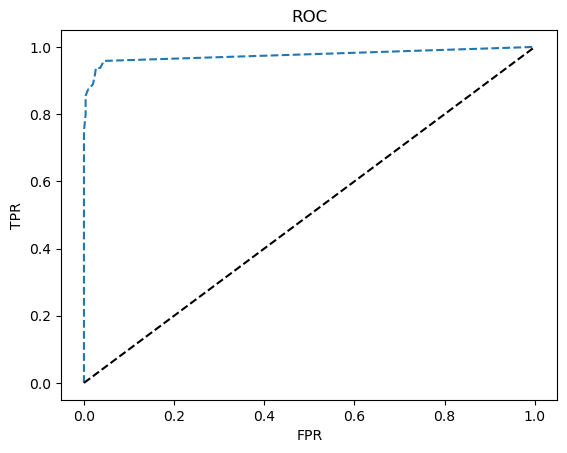

In [43]:
plt.plot(fpr, tpr, '--', label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [44]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=6,
                              min_samples_leaf=10,     
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=1)

In [45]:
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=target_name,
                           feature_names=feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

InvocationException: GraphViz's executables not found

In [46]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

InvocationException: GraphViz's executables not found